In [612]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [614]:
path = "/Users/devdgenus6572gmail.com/Desktop/IIT/neural network/cnn/charts/train_val/"
excel_path = "/Users/devdgenus6572gmail.com/Desktop/IIT/neural network/cnn/charts/train_val.csv"

files = os.listdir(path)
df = pd.read_csv(excel_path)
df.head(5)

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical


In [615]:
df['type'].unique()

array(['vbar_categorical', 'hbar_categorical', 'line', 'pie', 'dot_line'],
      dtype=object)

In [678]:
import cv2
sorted_files = []

for file in files:
    l = np.int64(file[0:file.find(".png")])
    sorted_files.append(l)
    sorted_files.sort()
    
x = []
y = []
for file_index in sorted_files:
    img = cv2.imread(path+str(file_index)+".png",0)
    x.append(img)
    y.append(df['type'][file_index])
    

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255

'hbar_categorical'

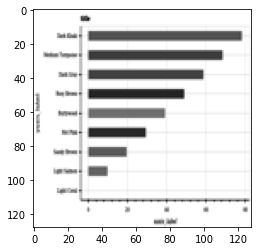

In [617]:
x = np.array(x)
y = np.array(y)
plt.imshow(x[350],cmap="gray")
y[350]


In [618]:
x.shape

(1000, 128, 128)

In [619]:
y.shape

(1000,)

In [620]:
x[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [621]:
y[0]

'vbar_categorical'

In [622]:
pd.Series(y).value_counts()

vbar_categorical    200
hbar_categorical    200
line                200
pie                 200
dot_line            200
dtype: int64

Name : pie


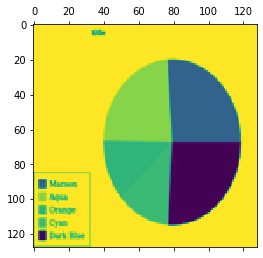

In [623]:
plt.matshow(x[700])
print('Name :',y[700])

In [624]:
from sklearn.model_selection import train_test_split

train_images, test_images,train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

In [676]:
train_images.shape

(800, 128, 128)

In [625]:
classes={'vbar_categorical':0,'hbar_categorical':1,'line':2,'pie':3,'dot_line':4}
print(classes)

train_labelsnum = [classes[label] for label in train_labels]


{'vbar_categorical': 0, 'hbar_categorical': 1, 'line': 2, 'pie': 3, 'dot_line': 4}


In [626]:
train_images=train_images/255
test_images=test_images/255

In [627]:
train_images.shape

(800, 128, 128)

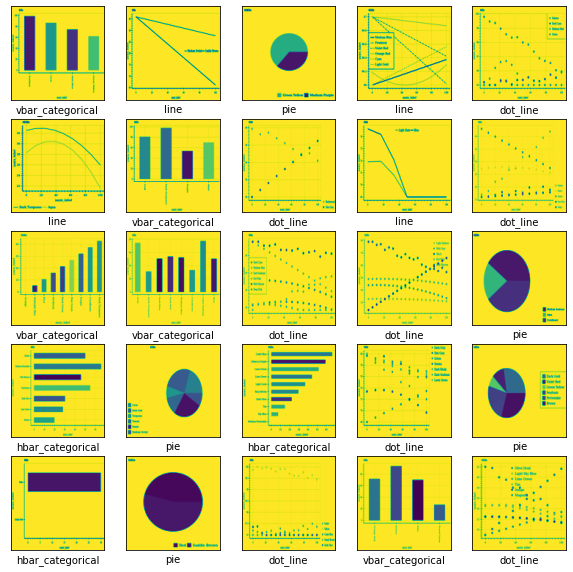

In [628]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labelsnum[[i][0]]])
plt.show()

In [668]:
# model = models.Sequential()
# model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(800,128,128,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(60, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(33, (3, 3), activation='relu'))



model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(60, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(33, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [669]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, 126, 126, 10)      280       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 63, 63, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_134 (Conv2D)         (None, 61, 61, 60)        5460      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 30, 30, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_135 (Conv2D)         (None, 28, 28, 33)        17853     
                                                                 
 flatten_34 (Flatten)        (None, 25872)           

In [670]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [671]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_133 (Conv2D)         (None, 126, 126, 10)      280       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 63, 63, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_134 (Conv2D)         (None, 61, 61, 60)        5460      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 30, 30, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_135 (Conv2D)         (None, 28, 28, 33)        17853     
                                                                 
 flatten_34 (Flatten)        (None, 25872)           

In [672]:
test_labels.shape


(200,)

In [673]:
test_images.shape



(200, 128, 128)

In [674]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                     validation_data=(test_images, test_labels))

Epoch 1/10


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_52" (type Sequential).
    
    Input 0 of layer "conv2d_133" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 128, 128)
    
    Call arguments received by layer "sequential_52" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 128, 128), dtype=float32)
      • training=True
      • mask=None
